In [1]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt
from ultralytics import YOLO
import torch

In [40]:
def distance(point, rectangle):
    # image = np.zeros((100, 100), dtype='uint8')
    (x0, y0) = point
    (x1,y1) = rectangle[:2]
    (x2,y2) = rectangle[2:]
    
    #minimum distance is in some corner point
    if x0>=x2 and y0<=y1:
        d=np.sqrt((x2-x0)**2+(y1-y0)**2)
        d_coord = [x0,y0, x2,y1]
    if x0<=x1 and y0<=y1:
        d=np.sqrt((x1-x0)**2+(y1-y0)**2)
        d_coord = [x0,y0, x1,y1]  
    if x0<=x1 and y0>=y2:
        d=np.sqrt((x1-x0)**2+(y2-y0)**2)
        d_coord = [x0,y0, x1,y2]    
    if x0>=x2 and y0>=y2:
        d=np.sqrt((x2-x0)**2+(y2-y0)**2)
        d_coord = [x0,y0, x2,y2]     
     #minimum distance is on the edge: draw perpendicular to that edge from (x0,y0)
    if x0>=x1 and x0<=x2 and y0>=y2:
        d=y0-y2
        d_coord = [x0,y0, x0,y2] 
    if x0>=x1 and x0<=x2 and y0<=y1:
        d=y1-y0
        d_coord = [x0,y0, x0,y1]  
    if y0>=y1 and y0<=y2 and x0>=x2:
        d=x0-x2
        d_coord = [x0,y0, x2,y0] 
    if y0>=y1 and y0<=y2 and x0<=x1:
        d=x1-x0
        d_coord = [x0,y0, x1,y0]      
        
    #draw distance
    # cv2.rectangle(image, (x1, y1), (x2, y2), color=(255,0,0), thickness=1)
    # cv2.circle(image, (x0,y0), radius=0, color=(255, 0, 0), thickness=-1)
    # cv2.line(image, d_coord[:2], d_coord[2:], color = (255, 255, 255), thickness=1)
    # plt.imshow(image)
    # plt.axis("off")
    return d

45.12205669071391


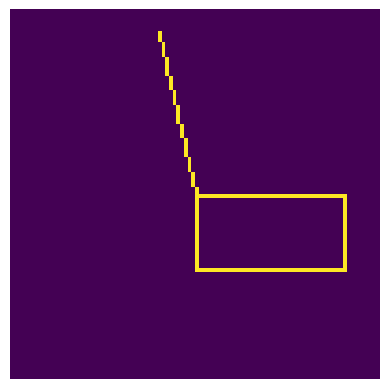

In [44]:
d = distance([40,6], [50, 50, 90, 70])
print(d)

In [2]:
def get_distance(rect1, rect2):
    # take senter of person as a point
    (x0, y0) = int((rect1[0]+rect1[2])/2), int((rect1[1]+rect1[3])/2)
    (x1,y1) = rect2[:2]
    (x2,y2) = rect2[2:]
    
    d=0
    
    #minimum distance is in some corner point
    if x0>=x2 and y0<=y1:
        d=np.sqrt((x2-x0)**2+(y1-y0)**2)
        d_coord = [x0,y0, x2,y1]
    if x0<=x1 and y0<=y1:
        d=np.sqrt((x1-x0)**2+(y1-y0)**2)
        d_coord = [x0,y0, x1,y1]  
    if x0<=x1 and y0>=y2:
        d=np.sqrt((x1-x0)**2+(y2-y0)**2)
        d_coord = [x0,y0, x1,y2]    
    if x0>=x2 and y0>=y2:
        d=np.sqrt((x2-x0)**2+(y2-y0)**2)
        d_coord = [x0,y0, x2,y2]     
     #minimum distance is on the edge: draw perpendicular to that edge from (x0,y0)
    if x0>=x1 and x0<=x2 and y0>=y2:
        d=y0-y2
        d_coord = [x0,y0, x0,y2] 
    if x0>=x1 and x0<=x2 and y0<=y1:
        d=y1-y0
        d_coord = [x0,y0, x0,y1]  
    if y0>=y1 and y0<=y2 and x0>=x2:
        d=x0-x2
        d_coord = [x0,y0, x2,y0] 
    if y0>=y1 and y0<=y2 and x0<=x1:
        d=x1-x0
        d_coord = [x0,y0, x1,y0]      
        
    
    return d

In [3]:
model = YOLO('yolov8n.pt')

In [5]:
cap = cv2.VideoCapture("videos/traffic2.mp4")


while True:
    _, frame = cap.read()
    
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = model.predict(img)
    people_boxes = []
    cars_boxes = []
    
    for r in results:
        boxes = r.boxes
        for box in boxes: 
            b = box.xyxy[0].numpy().astype("int") # get box coordinates in (top, left, bottom, right) format
            c = box.cls
            if model.names[int(c)]=="person":
                people_boxes.append(b)
            if model.names[int(c)] in ["car", "truck"]:
                cars_boxes.append(b)  
            
                           
            # print(b)
            # print(model.names[int(c)])
            if model.names[int(c)] in ['person', 'car', "truck"]:
                cv2.rectangle(frame, b[:2], b[2:], color = (255, 0, 0), thickness=2)
                
    # print(cars_boxes)            
    # d = get_distance(cars_boxes[0], cars_boxes[1])
    # print(d)
                
    for person in people_boxes:
        for car in cars_boxes:
            if get_distance(person, car)<10:
                print(get_distance(person, car))
                cv2.rectangle(frame, person[:2], person[2:], color = (0, 0, 255), thickness=3) 
                cv2.rectangle(frame, car[:2], car[2:], color = (0, 0, 255), thickness=3)
                cv2.putText(frame, "ALARM!", (20, 50), cv2.FONT_HERSHEY_SIMPLEX , fontScale = 1, color=(0, 0, 255), thickness=5) 
                            
    imS = cv2.resize(frame, (960, 540))        
    cv2.imshow('YOLO V8 Detection', imS)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 6 persons, 5 cars, 1 truck, 2 traffic lights, 665.1ms
Speed: 8.0ms preprocess, 665.1ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 5 cars, 1 truck, 1 traffic light, 182.4ms
Speed: 5.5ms preprocess, 182.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 4 cars, 1 truck, 1 traffic light, 224.3ms
Speed: 2.7ms preprocess, 224.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 4 cars, 1 truck, 1 traffic light, 159.0ms
Speed: 4.0ms preprocess, 159.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 4 cars, 1 truck, 2 traffic lights, 160.4ms
Speed: 6.0ms preprocess, 160.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 5 cars, 1 truck, 2 traffic lights, 152.6ms
Speed: 13.5ms preprocess, 152.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 per

0
0


Speed: 4.0ms preprocess, 145.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



0


0: 384x640 8 persons, 5 cars, 3 traffic lights, 162.8ms
Speed: 3.0ms preprocess, 162.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 5 cars, 3 traffic lights, 152.5ms


0


Speed: 4.0ms preprocess, 152.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 4 cars, 3 traffic lights, 147.3ms


0


Speed: 3.0ms preprocess, 147.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 6 cars, 3 traffic lights, 161.2ms
Speed: 1.6ms preprocess, 161.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



0


0: 384x640 8 persons, 5 cars, 3 traffic lights, 157.5ms
Speed: 0.0ms preprocess, 157.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 6 cars, 3 traffic lights, 143.4ms
Speed: 3.5ms preprocess, 143.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


0


0


0: 384x640 8 persons, 6 cars, 3 traffic lights, 172.2ms
Speed: 5.1ms preprocess, 172.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 5 cars, 3 traffic lights, 152.2ms


1


Speed: 4.3ms preprocess, 152.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



5


0: 384x640 8 persons, 5 cars, 3 traffic lights, 152.9ms
Speed: 4.0ms preprocess, 152.9ms inference, 11.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 6 cars, 1 truck, 4 traffic lights, 140.7ms
Speed: 9.0ms preprocess, 140.7ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 6 cars, 1 truck, 3 traffic lights, 139.5ms
Speed: 4.0ms preprocess, 139.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


6
6



0: 384x640 9 persons, 4 cars, 1 truck, 3 traffic lights, 146.4ms
Speed: 1.9ms preprocess, 146.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 4 cars, 1 truck, 3 traffic lights, 130.7ms
Speed: 3.9ms preprocess, 130.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 4 cars, 1 truck, 3 traffic lights, 143.4ms
Speed: 0.0ms preprocess, 143.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 5 cars, 3 traffic lights, 171.0ms
Speed: 0.6ms preprocess, 171.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



8


0: 384x640 9 persons, 4 cars, 3 traffic lights, 166.8ms
Speed: 0.6ms preprocess, 166.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 4 cars, 3 traffic lights, 139.8ms


9


Speed: 4.5ms preprocess, 139.8ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 4 cars, 1 truck, 5 traffic lights, 147.9ms


8


Speed: 4.1ms preprocess, 147.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 5 cars, 1 truck, 5 traffic lights, 143.1ms


8


Speed: 4.6ms preprocess, 143.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 5 cars, 4 traffic lights, 147.1ms
Speed: 3.2ms preprocess, 147.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 5 cars, 1 truck, 3 traffic lights, 135.5ms
Speed: 5.7ms preprocess, 135.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 5 cars, 2 traffic lights, 172.8ms
Speed: 1.8ms preprocess, 172.8ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 5 cars, 1 truck, 1 traffic light, 124.7ms
Speed: 3.7ms preprocess, 124.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 5 cars, 1 truck, 2 traffic lights, 130.9ms
Speed: 3.2ms preprocess, 130.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 5 cars, 1 truck, 3 traffic lights, 156.9ms
Speed: 2.5ms preprocess, 156.9ms i

7


0: 384x640 6 persons, 4 cars, 1 truck, 4 traffic lights, 197.8ms
Speed: 4.1ms preprocess, 197.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 4 cars, 1 truck, 4 traffic lights, 162.0ms


9


Speed: 4.0ms preprocess, 162.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



9


0: 384x640 9 persons, 4 cars, 1 truck, 4 traffic lights, 200.9ms
Speed: 4.5ms preprocess, 200.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 4 cars, 5 traffic lights, 177.7ms
Speed: 5.7ms preprocess, 177.7ms inference, 15.9ms postprocess per image at shape (1, 3, 384, 640)



9


0: 384x640 9 persons, 4 cars, 1 truck, 4 traffic lights, 151.2ms
Speed: 3.2ms preprocess, 151.2ms inference, 15.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 4 cars, 1 truck, 3 traffic lights, 134.9ms


9


Speed: 3.2ms preprocess, 134.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 4 cars, 2 traffic lights, 142.8ms


8


Speed: 4.1ms preprocess, 142.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 bicycle, 4 cars, 3 traffic lights, 149.2ms


4


Speed: 3.1ms preprocess, 149.2ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 bicycle, 4 cars, 1 truck, 4 traffic lights, 140.5ms


3


Speed: 3.4ms preprocess, 140.5ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 4 cars, 1 truck, 4 traffic lights, 158.3ms


3
5


Speed: 3.7ms preprocess, 158.3ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 4 cars, 4 traffic lights, 147.2ms


5
6


Speed: 4.0ms preprocess, 147.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 4 cars, 4 traffic lights, 132.7ms


6


Speed: 4.7ms preprocess, 132.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



7


0: 384x640 10 persons, 4 cars, 4 traffic lights, 210.0ms
Speed: 6.3ms preprocess, 210.0ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 4 cars, 4 traffic lights, 142.2ms


8


Speed: 3.0ms preprocess, 142.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



7


0: 384x640 9 persons, 4 cars, 4 traffic lights, 166.9ms
Speed: 4.2ms preprocess, 166.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 4 cars, 5 traffic lights, 148.6ms


8


Speed: 3.0ms preprocess, 148.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 4 cars, 5 traffic lights, 159.1ms


7


Speed: 3.4ms preprocess, 159.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 bicycle, 5 cars, 3 traffic lights, 164.8ms


6


Speed: 4.3ms preprocess, 164.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 1 bicycle, 4 cars, 3 traffic lights, 145.9ms


7


Speed: 5.8ms preprocess, 145.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 4 cars, 1 truck, 3 traffic lights, 146.4ms


7


Speed: 3.0ms preprocess, 146.4ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 4 cars, 4 traffic lights, 128.6ms
Speed: 3.3ms preprocess, 128.6ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)


6
8


In [52]:
cap.release()
cv2.destroyAllWindows()